# Relatório de Análise VII

## Criando agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/alguel_dados_residencial.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
dados['Valor'].mean()

5086.237660471798

In [5]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [6]:
selecao = dados['Bairro'].isin(bairros)

In [7]:
dados = dados[selecao]

dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21567,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21568,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21569,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
21571,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [8]:
grupo_bairro = dados.groupby('Bairro')

grupo_bairro

In [9]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 92, 106, 109, 111, 116, 129, 131, 135, 149, 152, 154, 164, 165, 172, 185, 188, 206, 212, 218, 221, 230, 233, 236, 241, 256, 262, 271, 273, 288, 289, 290, 292, 299, 304, 307, 321, 330, 331, 340, 355, 361, 363, 369, 375, 382, 384, 395, 407, 427, 428, 430, 431, 434, 444, 446, 457, 458, 460, 468, 471, 479, 489, 495, 498, 506, 532, 533, 534, 535, 538, 542, 547, 549, 550, 551, 579, 582, 583, 585, 589, 591, 596, 606, 617, 625, ...], 'Botafogo': [23, 48, 86, 87, 110, 118, 126, 133, 195, 199, 222, 329, 357, 410, 411, 493, 519, 521, 540, 588, 644, 680, 713, 750, 759, 820, 853, 907, 915, 919, 997, 1033, 1070, 1081, 1100, 1106, 1117, 1130, 1155, 1191, 1195, 1213, 1240, 1272, 1285, 1294, 1307, 1338, 1371, 1402, 1407, 1442, 1503, 1515, 1564, 1615, 1639, 1653, 1682, 1723, 1724, 1769, 1795, 1804, 1807, 1834, 1903, 1912, 1938, 1953, 1962, 1970, 2010, 2047, 2050, 2062, 2064, 2065, 2068, 2077, 2128, 2129, 2145, 2159, 2177, 22

In [10]:
for bairro, data in grupo_bairro:
        print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [11]:
# É notado que cada item iterado é um dataframe para cada bairro, agrupados
for bairro, dados in grupo_bairro:
        print(dados)

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21552  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21562         Apartamento  Barra da Tijuca        2      1       1    85   
21563         Apartamento  Barra da Tijuca        3      2       0    98   
21564         Apartamento  Barra da Tijuca        3      2       2   140   
21571  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPTU  Valor m2 Tipo Agregado  
5      22000.0         0.0

In [12]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 2037.8175115207373
Botafogo -> 2037.8175115207373
Copacabana -> 2037.8175115207373
Flamengo -> 2037.8175115207373
Ipanema -> 2037.8175115207373
Leblon -> 2037.8175115207373
Tijuca -> 2037.8175115207373


In [13]:
# Forma mais simples e objetiva
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8843.59,986.16
Copacabana,4126.58,1149.42
Flamengo,4112.56,1103.70
Ipanema,9353.90,2245.72
Leblon,8746.34,2107.18
Tijuca,2037.82,719.72


In [14]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,863.0,8843.59,153081.72,700.0,2200.0,3000.0,4332.5,4500000.0
Copacabana,2642.0,4126.58,3612.61,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,713.0,4112.56,3841.73,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1763.0,9353.90,8221.66,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1085.0,2037.82,1671.27,750.0,1500.0,1800.0,2300.0,45000.0


In [15]:
# Analisar outras estatísticas usando o método aggregate
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7632016.0
Copacabana,100.0,35000.0,10902434.0
Flamengo,800.0,35000.0,2932258.0
Ipanema,1200.0,90000.0,16490930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2211032.0


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(20, 10))

<Axes: xlabel='Bairro'>

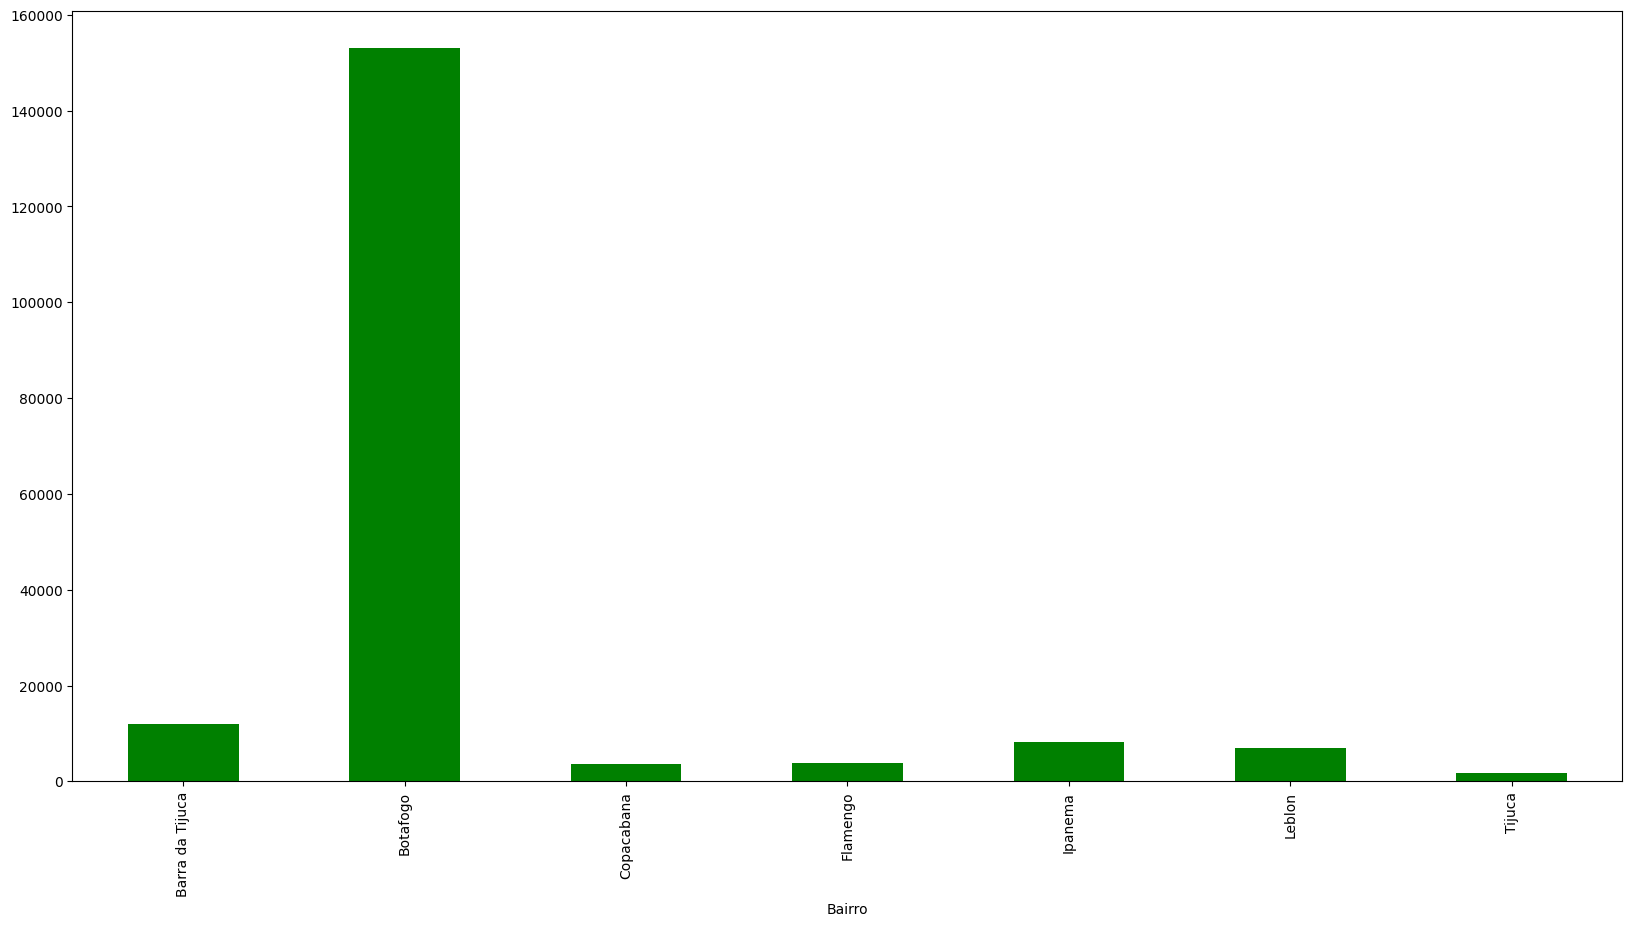

In [24]:
# Analisando o Desvio padrão
grupo_bairro['Valor'].std().plot.bar(color='green')

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

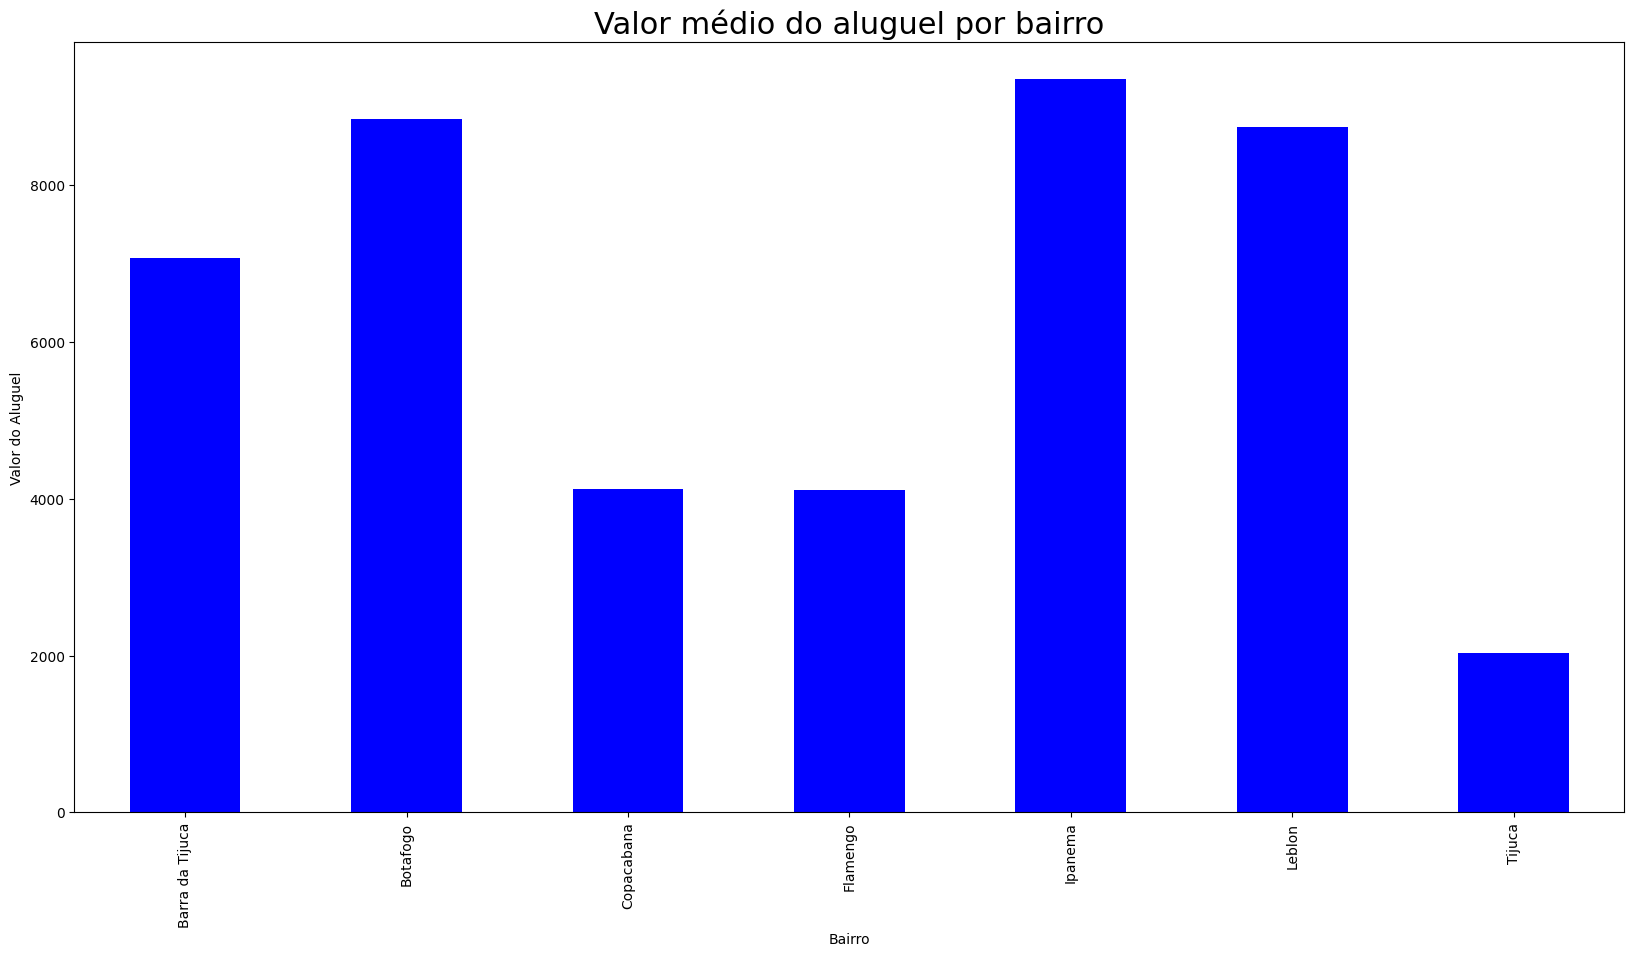

In [26]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')

fig.set_ylabel('Valor do Aluguel')

fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})